In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from os import listdir

In [ ]:
# folder = "prepared_stock_data"
# for i, stock in enumerate(listdir(folder)):
#     try:
#         if i == 0:
#             data = pd.read_csv(folder + "//" + stock)
#         else:
#             data = data.append(pd.read_csv(folder + "//" + stock))
#     except:
#         print(i)

In [ ]:
#data.to_csv("stocks_prepared_dataset.csv")

In [2]:
data = pd.read_csv("stocks_prepared_dataset.csv").drop(["Unnamed: 0","Name"],axis=1)

In [3]:
data

,Unnamed: 0.1,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T23,T24,T25,T26,T27,T28,T29,T30,T31,Label
0,2009-12-16,1.250608,1.247874,1.109464,1.104664,1.635328,1.627841,1.720588,1.773613,1.794562,...,1.300995,1.111872,0.991389,0.631393,0.768642,0.216305,0.093381,0.089517,0.029494,NaN
1,2009-12-17,1.208991,1.072976,1.068259,1.589744,1.582386,1.673529,1.725637,1.746224,1.849530,...,1.208991,1.104167,0.938166,0.608850,0.607427,0.172903,0.095181,0.027119,-0.023631,NaN
2,2009-12-18,1.068415,1.063709,1.584046,1.576705,1.667647,1.719640,1.740181,1.843260,1.949593,...,1.119159,1.169856,0.837893,0.609583,0.587052,0.169568,0.079762,0.010022,-0.019459,NaN
3,2009-12-21,1.026166,1.537037,1.529830,1.619118,1.670165,1.690332,1.791536,1.895935,1.948675,...,1.058960,1.083041,0.719112,0.614687,0.515745,0.130794,0.099383,-0.004472,-0.020352,NaN
4,2009-12-22,1.508547,1.501420,1.589706,1.640180,1.660121,1.760188,1.863415,1.915563,1.949749,...,1.071765,0.969799,0.636617,0.587917,0.498723,0.125240,0.100625,0.022055,-0.029217,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201725,2019-12-24,-0.049105,-0.028598,-0.025858,-0.053449,-0.043839,-0.046480,-0.078292,-0.069600,-0.057754,...,-0.065404,-0.001446,-0.166868,-0.234577,-0.123890,-0.114908,-0.031776,0.074689,0.028288,True
1201726,2019-12-26,-0.024379,-0.021627,-0.049338,-0.039686,-0.042338,-0.074288,-0.065559,-0.053661,-0.038799,...,-0.057091,-0.005733,-0.149571,-0.209647,-0.139371,-0.109161,0.038942,0.084419,0.034809,True
1201727,2019-12-27,-0.029149,-0.056647,-0.047070,-0.049701,-0.081406,-0.072744,-0.060937,-0.046189,-0.066878,...,-0.063492,-0.008165,-0.141372,-0.189560,-0.148454,-0.111828,-0.015729,0.105460,-0.003378,False
1201728,2019-12-30,-0.056647,-0.047070,-0.049701,-0.081406,-0.072744,-0.060937,-0.046189,-0.066878,-0.059226,...,-0.045749,-0.041318,-0.149856,-0.145635,-0.124629,-0.116389,0.036126,0.081718,-0.007689,True


In [5]:
START = "2016-01-01"
MIDDLE = "2019-01-01"
END = "2020-01-01"
training_data = data[(data["Unnamed: 0.1"] >= START) & (data["Unnamed: 0.1"] < MIDDLE)]
testing_data = data[(data["Unnamed: 0.1"] >= MIDDLE) & (data["Unnamed: 0.1"] < END)]
print(training_data.shape, testing_data.shape)

(370947, 33) (124695, 33)


In [6]:
training_data = training_data.dropna()
testing_data = testing_data.dropna()
print(training_data.shape, testing_data.shape)

(370805, 33) (124522, 33)


In [7]:
training_data

,Unnamed: 0.1,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,T23,T24,T25,T26,T27,T28,T29,T30,T31,Label
1521,2016-01-04,0.400951,0.437328,0.417145,0.372014,0.336479,0.345041,0.336773,0.359354,0.360366,...,0.194000,0.178440,0.124123,0.109107,0.161875,0.094947,0.044545,0.088488,-0.015840,True
1522,2016-01-05,0.436541,0.416369,0.371263,0.335748,0.344305,0.336041,0.358610,0.359622,0.382268,...,0.195691,0.180079,0.110185,0.088930,0.135951,0.086985,0.061947,0.100947,-0.011050,False
1523,2016-01-06,0.399457,0.354890,0.319798,0.328253,0.320088,0.342387,0.343387,0.365763,0.375553,...,0.207349,0.167800,0.075543,0.080438,0.067396,0.087014,0.040792,0.097196,-0.012482,True
1524,2016-01-07,0.350458,0.315481,0.323908,0.315770,0.337997,0.338993,0.361296,0.371054,0.348230,...,0.195479,0.164131,0.073305,0.079232,0.109877,0.092146,0.054051,0.030372,-0.015172,True
1525,2016-01-08,0.352063,0.360725,0.352360,0.375205,0.376229,0.399152,0.409181,0.385723,0.396720,...,0.220930,0.187050,0.093491,0.104999,0.121291,0.128136,0.074169,0.000867,0.024447,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201473,2018-12-24,-0.404785,-0.407311,-0.417014,-0.438119,-0.431967,-0.420734,-0.421287,-0.412868,-0.424953,...,-0.415513,-0.403612,-0.391625,-0.426949,-0.375516,-0.409623,-0.316522,-0.185650,-0.001649,True
1201474,2018-12-26,-0.416123,-0.425682,-0.446473,-0.440413,-0.429346,-0.429892,-0.421597,-0.433502,-0.445443,...,-0.415168,-0.406830,-0.390875,-0.428069,-0.400067,-0.418401,-0.340096,-0.198477,-0.018112,False
1201475,2018-12-27,-0.411236,-0.432550,-0.426337,-0.414992,-0.415551,-0.407048,-0.419253,-0.431494,-0.438972,...,-0.412556,-0.380196,-0.379147,-0.398294,-0.369543,-0.391708,-0.317962,-0.146182,0.009912,False
1201476,2018-12-28,-0.408725,-0.402252,-0.390431,-0.391013,-0.382153,-0.394870,-0.407626,-0.415418,-0.415418,...,-0.382553,-0.364905,-0.343975,-0.361937,-0.349336,-0.358725,-0.232838,-0.134903,0.068195,True


In [8]:
def f(x):
    if x == False:
        return 0
    return 1
columns = ["T"+str(i) for i in range(1,32)]
Y_training = training_data['Label'].apply(lambda x: f(x))
Y_testing = testing_data['Label'].apply(lambda x: f(x))

In [9]:
class TrainingData(Dataset):
    def __init__(self):
        self.x = torch.tensor(training_data[columns].values).float()
        self.y = torch.tensor(Y_training.values).long()
        self.len = self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len
    
class TestingData(Dataset):
    def __init__(self):
        self.x = torch.tensor(testing_data[columns].values).float()
        self.y = torch.tensor(Y_testing.values).long()
        self.len = self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

In [38]:
class DNN_Model1(nn.Module):
    def __init__(self, D_in, H1, H2, H3, D_out=2, p=0.5):
        super(DNN_Model1, self).__init__()
        self.drop = nn.Dropout(p = p)
        self.channel1_l1 = nn.Linear(D_in, H1)
        self.channel1_l2 = nn.Linear(H1, H2)
        self.channel1_l3 = nn.Linear(H2, H3)
        
        self.channel2_l1 = nn.Linear(D_in, H1)
        self.channel2_l2 = nn.Linear(H1, H2)
        self.channel2_l3 = nn.Linear(H2, H3)
        
        self.out = nn.Linear(H3, D_out)

    def forward(self, x):
        x = torch.max(self.drop(self.channel1_l1(x)), self.drop(self.channel2_l1(x)))
        x = torch.max(self.drop(self.channel1_l2(x)), self.drop(self.channel2_l2(x)))
        x = torch.max(self.drop(self.channel1_l3(x)), self.drop(self.channel2_l3(x)))
        x = F.softmax(self.out(x))
        return x

In [10]:
class DNN_Carlos(nn.Module):
    def __init__(self, D_in, H1, H2, H3, D_out=2):
        super(DNN_Carlos, self).__init__()
        self.drop1 = nn.Dropout(p = 0.5)
        self.drop2 = nn.Dropout(p = 0.25)
        
        self.linear1_1 = nn.Linear(D_in, H1)
        torch.nn.init.torch.nn.init.xavier_uniform_(self.linear1_1.weight)
        self.linear2_1 = nn.Linear(H1, H2)
        torch.nn.init.torch.nn.init.xavier_uniform_(self.linear2_1.weight)
        self.linear3_1 = nn.Linear(H2, H3)
        torch.nn.init.torch.nn.init.xavier_uniform_(self.linear3_1.weight)
        self.linear1_2 = nn.Linear(D_in, H1)
        torch.nn.init.torch.nn.init.xavier_uniform_(self.linear1_2.weight)
        self.linear2_2 = nn.Linear(H1, H2)
        torch.nn.init.torch.nn.init.xavier_uniform_(self.linear2_2.weight)
        self.linear3_2 = nn.Linear(H2, H3)
        torch.nn.init.torch.nn.init.xavier_uniform_(self.linear3_2.weight)
        
        self.bn1 = nn.BatchNorm1d(H1)
        self.bn2 = nn.BatchNorm1d(H2)
        self.bn3 = nn.BatchNorm1d(H3)
        
        self.out = nn.Linear(H3, D_out)

    def forward(self, x):
        x = torch.max(self.bn1(self.drop1(self.linear1_1(x))), self.bn1(self.drop1(self.linear1_2(x))))
        x = torch.max(self.bn2(self.drop2(self.linear2_1(x))), self.bn2(self.drop2(self.linear2_2(x))))
        x = torch.max(self.bn3(self.linear3_1(x)), self.bn3(self.linear3_2(x)))
        x = F.softmax(self.out(x))
        return x

In [43]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    training_info = {'training_loss':[], 'validation_accuracy': []}
    MIN = 9999
    COUNTER = 0
    temp = []
    for epoch in range(epochs):
        
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            y_hat = model(x)
            lambda1 = 0.00001
            all_params = torch.cat([b.view(-1) for b in model.parameters()])
            l1_regularization = lambda1 * torch.norm(all_params, 1)
            loss = criterion(y_hat,y) + l1_regularization
            loss.backward()
            optimizer.step()
            training_info['training_loss'].append(loss.data.item())
        
        if MIN == 9999 or loss.data.item() < MIN or epoch < 400:
            MIN = loss.data.item()
            COUNTER = 0
        else:
            COUNTER += 1
            
        correct = 0
        accuracy = 0
        for x, y in validation_loader:
            z = model(x)
            _, y_hat = torch.max(z,1)
            correct = (y_hat == y).sum().item()
            accuracy += correct/x.shape[0]
        training_info['validation_accuracy'].append(accuracy/len(validation_loader))
        
        if COUNTER == 5:
            print("FINISHED!!!")
            print("LOSS:",training_info['training_loss'][-1],"ACCURCY:",training_info['validation_accuracy'][-1])
            print("current epoch",epoch+1,", ", 100*(epoch+1)/epochs, "% completed")
            break
        
        print("LOSS:",training_info['training_loss'][-1],"ACCURCY:",training_info['validation_accuracy'][-1])
        print("current epoch",epoch+1,", ", 100*(epoch+1)/epochs, "% completed")
        
        

        
    return training_info

In [11]:
def trainMyModel(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    training_info = {'training_loss':[], 'validation_accuracy': []}
    MIN = 9999
    COUNTER = 0
    temp = []
    for epoch in range(epochs):
        
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            y_hat = model(x)
            loss = criterion(y_hat,y)
            loss.backward()
            optimizer.step()
            training_info['training_loss'].append(loss.data.item())
        
#         if MIN == 9999 or loss.data.item() < MIN:
#             MIN = loss.data.item()
#             COUNTER = 0
#         else:
#             COUNTER += 1
            
        correct = 0
        accuracy = 0
        for x, y in validation_loader:
            z = model(x)
            _, y_hat = torch.max(z,1)
            correct = (y_hat == y).sum().item()
            accuracy += correct/x.shape[0]
        training_info['validation_accuracy'].append(accuracy/len(validation_loader))
        
#         if COUNTER == 10:
#             print("FINISHED!!!")
#             print("LOSS:",training_info['training_loss'][-1],"ACCURCY:",training_info['validation_accuracy'][-1])
#             print("current epoch",epoch+1,", ", 100*(epoch+1)/epochs, "% completed")
#             break
        
        print("LOSS:",training_info['training_loss'][-1],"ACCURCY:",training_info['validation_accuracy'][-1])
        print("current epoch",epoch+1,", ", 100*(epoch+1)/epochs, "% completed")
        
        

        
    return training_info

In [44]:
input_dim = 31
hidden1 = 31
hidden2 = 10
hidden3 = 5
out_dim = 2
dropout_rate = 0.5

model1 = DNN_Model1(input_dim, hidden1, hidden2, hidden3, out_dim, dropout_rate)
#model1.to("cuda")

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adadelta(model1.parameters())

In [45]:
training = TrainingData()
testing = TestingData()
train_loader = DataLoader(dataset = training, batch_size=2000, shuffle = True)
validation_loader = DataLoader(dataset = testing, batch_size=5000)

In [46]:
model1_trainingInfo = train(model1, criterion, train_loader, validation_loader, optimizer, 500)

/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


LOSS: 0.6959367394447327 ACCURCY: 0.5086829933657674
current epoch 1 ,  0.2 % completed
LOSS: 0.6957643628120422 ACCURCY: 0.5139858929677135
current epoch 2 ,  0.4 % completed
LOSS: 0.6937947869300842 ACCURCY: 0.5161575302963292
current epoch 3 ,  0.6 % completed
LOSS: 0.6932427287101746 ACCURCY: 0.526828107916851
current epoch 4 ,  0.8 % completed
LOSS: 0.6922315955162048 ACCURCY: 0.5341626855373728
current epoch 5 ,  1.0 % completed
LOSS: 0.685382068157196 ACCURCY: 0.5502109544449358
current epoch 6 ,  1.2 % completed
LOSS: 0.683434247970581 ACCURCY: 0.5814775055285272
current epoch 7 ,  1.4 % completed
LOSS: 0.6685751676559448 ACCURCY: 0.6098305670057497
current epoch 8 ,  1.6 % completed
LOSS: 0.6506060361862183 ACCURCY: 0.648601708978328
current epoch 9 ,  1.8 % completed
LOSS: 0.6431757807731628 ACCURCY: 0.6526737762052189
current epoch 10 ,  2.0 % completed
LOSS: 0.6323659420013428 ACCURCY: 0.6364226483856701
current epoch 11 ,  2.2 % completed
LOSS: 0.6620650887489319 ACCURCY: 

LOSS: 0.6301478147506714 ACCURCY: 0.6857526227333038
current epoch 93 ,  18.6 % completed
LOSS: 0.5873355269432068 ACCURCY: 0.681057333923043
current epoch 94 ,  18.8 % completed
LOSS: 0.6144762635231018 ACCURCY: 0.6847509314462628
current epoch 95 ,  19.0 % completed
LOSS: 0.6198253631591797 ACCURCY: 0.6690926492702345
current epoch 96 ,  19.2 % completed
LOSS: 0.5894169807434082 ACCURCY: 0.6855037098628923
current epoch 97 ,  19.4 % completed
LOSS: 0.5954968333244324 ACCURCY: 0.6846135621406455
current epoch 98 ,  19.6 % completed
LOSS: 0.6045699715614319 ACCURCY: 0.6835849447147281
current epoch 99 ,  19.8 % completed
LOSS: 0.6056017279624939 ACCURCY: 0.678537723131358
current epoch 100 ,  20.0 % completed
LOSS: 0.6104379296302795 ACCURCY: 0.6802476426360016
current epoch 101 ,  20.2 % completed
LOSS: 0.6041780114173889 ACCURCY: 0.6779756426360017
current epoch 102 ,  20.4 % completed
LOSS: 0.6125112175941467 ACCURCY: 0.6848473206545777
current epoch 103 ,  20.6 % completed
LOSS: 0.

LOSS: 0.5938264727592468 ACCURCY: 0.682481723131358
current epoch 184 ,  36.8 % completed
LOSS: 0.6010465025901794 ACCURCY: 0.6836759380804953
current epoch 185 ,  37.0 % completed
LOSS: 0.615837574005127 ACCURCY: 0.6838212401592216
current epoch 186 ,  37.2 % completed
LOSS: 0.6099266409873962 ACCURCY: 0.6858793206545777
current epoch 187 ,  37.4 % completed
LOSS: 0.600408673286438 ACCURCY: 0.6830577903582485
current epoch 188 ,  37.6 % completed
LOSS: 0.6073696613311768 ACCURCY: 0.6781831862007961
current epoch 189 ,  37.8 % completed
LOSS: 0.6234476566314697 ACCURCY: 0.6863162600619195
current epoch 190 ,  38.0 % completed
LOSS: 0.599342405796051 ACCURCY: 0.682990475011057
current epoch 191 ,  38.2 % completed
LOSS: 0.5796288251876831 ACCURCY: 0.6860978575851394
current epoch 192 ,  38.4 % completed
LOSS: 0.618959903717041 ACCURCY: 0.6851168509509067
current epoch 193 ,  38.6 % completed
LOSS: 0.5963111519813538 ACCURCY: 0.6854616965944272
current epoch 194 ,  38.8 % completed
LOSS:

LOSS: 0.5847486853599548 ACCURCY: 0.6846800318443167
current epoch 275 ,  55.0 % completed
LOSS: 0.5938383936882019 ACCURCY: 0.6842771057054401
current epoch 276 ,  55.2 % completed
LOSS: 0.6068151593208313 ACCURCY: 0.6852990924369748
current epoch 277 ,  55.4 % completed
LOSS: 0.6045072078704834 ACCURCY: 0.6860560990712075
current epoch 278 ,  55.6 % completed
LOSS: 0.5940644145011902 ACCURCY: 0.6760910252100841
current epoch 279 ,  55.8 % completed
LOSS: 0.5781146287918091 ACCURCY: 0.6862987032286598
current epoch 280 ,  56.0 % completed
LOSS: 0.6107584238052368 ACCURCY: 0.6834410119416187
current epoch 281 ,  56.2 % completed
LOSS: 0.5969504714012146 ACCURCY: 0.6845701795665633
current epoch 282 ,  56.4 % completed
LOSS: 0.6107298731803894 ACCURCY: 0.680240944714728
current epoch 283 ,  56.6 % completed
LOSS: 0.613676905632019 ACCURCY: 0.6856970119416188
current epoch 284 ,  56.8 % completed
LOSS: 0.5890577435493469 ACCURCY: 0.6832245555064133
current epoch 285 ,  57.0 % completed
L

LOSS: 0.5951645374298096 ACCURCY: 0.6842905687748784
current epoch 366 ,  73.2 % completed
LOSS: 0.6213719248771667 ACCURCY: 0.6863820185758515
current epoch 367 ,  73.4 % completed
LOSS: 0.5902008414268494 ACCURCY: 0.6849104077841662
current epoch 368 ,  73.6 % completed
LOSS: 0.5950232148170471 ACCURCY: 0.6827019513489606
current epoch 369 ,  73.8 % completed
LOSS: 0.6076456308364868 ACCURCY: 0.6824383405572754
current epoch 370 ,  74.0 % completed
LOSS: 0.612338125705719 ACCURCY: 0.6854148642193719
current epoch 371 ,  74.2 % completed
LOSS: 0.6093558669090271 ACCURCY: 0.6853083945157011
current epoch 372 ,  74.4 % completed
LOSS: 0.6066961884498596 ACCURCY: 0.6853718708536047
current epoch 373 ,  74.6 % completed
LOSS: 0.6170029044151306 ACCURCY: 0.682790864219372
current epoch 374 ,  74.8 % completed
LOSS: 0.6290319561958313 ACCURCY: 0.6850267032286598
current epoch 375 ,  75.0 % completed
LOSS: 0.6022053956985474 ACCURCY: 0.6850097903582486
current epoch 376 ,  75.2 % completed
L

# 2019 trading data

## Paper's model

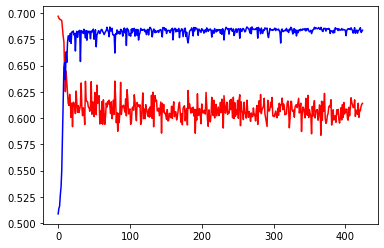

In [47]:
steps = int(len(model1_trainingInfo["training_loss"])/len(model1_trainingInfo["validation_accuracy"]))
plt.plot(model1_trainingInfo["training_loss"][::steps], color = "red")
plt.plot(model1_trainingInfo["validation_accuracy"], color = "blue")

In [48]:
path = "models//model1_2019.pth"

In [49]:
torch.save(model1.state_dict(), path)


## Carlos' model

In [13]:
input_dim = 31
hidden1 = 31
hidden2 = 10
hidden3 = 5
out_dim = 2

modelCarlos = DNN_Carlos(input_dim, hidden1, hidden2, hidden3, out_dim)
#model.to("cuda")

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelCarlos.parameters(), lr=1e-4)

training = TrainingData()
testing = TestingData()
train_loader = DataLoader(dataset = training, batch_size=2000, shuffle = True)
validation_loader = DataLoader(dataset = testing, batch_size=5000)

In [14]:
model_trainingInfo = trainMyModel(modelCarlos, criterion, train_loader, validation_loader, optimizer, 400)

/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


LOSS: 0.6932560801506042 ACCURCY: 0.504671288810261
current epoch 1 ,  0.25 % completed
LOSS: 0.6877304315567017 ACCURCY: 0.5130068323750552
current epoch 2 ,  0.5 % completed
LOSS: 0.6947372555732727 ACCURCY: 0.5174140539584254
current epoch 3 ,  0.75 % completed
LOSS: 0.6881840229034424 ACCURCY: 0.5241116249447146
current epoch 4 ,  1.0 % completed
LOSS: 0.6918426156044006 ACCURCY: 0.528704537815126
current epoch 5 ,  1.25 % completed
LOSS: 0.6905996799468994 ACCURCY: 0.532628376824414
current epoch 6 ,  1.5 % completed
LOSS: 0.6935129165649414 ACCURCY: 0.5349332224679345
current epoch 7 ,  1.75 % completed
LOSS: 0.6826907992362976 ACCURCY: 0.5440724175143742
current epoch 8 ,  2.0 % completed
LOSS: 0.6835914254188538 ACCURCY: 0.5477861088014153
current epoch 9 ,  2.25 % completed
LOSS: 0.6807680130004883 ACCURCY: 0.5546746996904026
current epoch 10 ,  2.5 % completed
LOSS: 0.6841768622398376 ACCURCY: 0.560943384343211
current epoch 11 ,  2.75 % completed
LOSS: 0.6924034953117371 ACC

LOSS: 0.6140177845954895 ACCURCY: 0.6785651057054402
current epoch 93 ,  23.25 % completed
LOSS: 0.5935254096984863 ACCURCY: 0.6808578575851394
current epoch 94 ,  23.5 % completed
LOSS: 0.5841518044471741 ACCURCY: 0.6805205555064133
current epoch 95 ,  23.75 % completed
LOSS: 0.6138182282447815 ACCURCY: 0.6809058575851394
current epoch 96 ,  24.0 % completed
LOSS: 0.5963857173919678 ACCURCY: 0.6802140185758515
current epoch 97 ,  24.25 % completed
LOSS: 0.6191330552101135 ACCURCY: 0.6808203272888101
current epoch 98 ,  24.5 % completed
LOSS: 0.5912036299705505 ACCURCY: 0.6792729447147279
current epoch 99 ,  24.75 % completed
LOSS: 0.614129900932312 ACCURCY: 0.6807895621406459
current epoch 100 ,  25.0 % completed
LOSS: 0.5957169532775879 ACCURCY: 0.6811175621406457
current epoch 101 ,  25.25 % completed
LOSS: 0.5973830819129944 ACCURCY: 0.6800784750110569
current epoch 102 ,  25.5 % completed
LOSS: 0.587011456489563 ACCURCY: 0.6807210119416186
current epoch 103 ,  25.75 % completed
LO

LOSS: 0.5941091775894165 ACCURCY: 0.6841336293675364
current epoch 183 ,  45.75 % completed
LOSS: 0.59941166639328 ACCURCY: 0.6819370119416187
current epoch 184 ,  46.0 % completed
LOSS: 0.6024258732795715 ACCURCY: 0.6841731729323309
current epoch 185 ,  46.25 % completed
LOSS: 0.5950587391853333 ACCURCY: 0.6838254011499335
current epoch 186 ,  46.5 % completed
LOSS: 0.6095238924026489 ACCURCY: 0.6832194816452895
current epoch 187 ,  46.75 % completed
LOSS: 0.6056148409843445 ACCURCY: 0.6848763945157009
current epoch 188 ,  47.0 % completed
LOSS: 0.6000233292579651 ACCURCY: 0.6813382467934542
current epoch 189 ,  47.25 % completed
LOSS: 0.6203778386116028 ACCURCY: 0.685062475011057
current epoch 190 ,  47.5 % completed
LOSS: 0.609157919883728 ACCURCY: 0.6835222467934543
current epoch 191 ,  47.75 % completed
LOSS: 0.5895854830741882 ACCURCY: 0.6815643945157008
current epoch 192 ,  48.0 % completed
LOSS: 0.6052344441413879 ACCURCY: 0.6848014683768245
current epoch 193 ,  48.25 % complet

LOSS: 0.6232876181602478 ACCURCY: 0.6836389314462626
current epoch 273 ,  68.25 % completed
LOSS: 0.595920741558075 ACCURCY: 0.6832422467934544
current epoch 274 ,  68.5 % completed
LOSS: 0.5895010232925415 ACCURCY: 0.6846692401592216
current epoch 275 ,  68.75 % completed
LOSS: 0.5861902236938477 ACCURCY: 0.6842140858027421
current epoch 276 ,  69.0 % completed
LOSS: 0.6117349863052368 ACCURCY: 0.6820620858027421
current epoch 277 ,  69.25 % completed
LOSS: 0.5990943312644958 ACCURCY: 0.6857652401592216
current epoch 278 ,  69.5 % completed
LOSS: 0.6002053618431091 ACCURCY: 0.6848544750110568
current epoch 279 ,  69.75 % completed
LOSS: 0.580735445022583 ACCURCY: 0.6855303140203449
current epoch 280 ,  70.0 % completed
LOSS: 0.6033666133880615 ACCURCY: 0.6853652401592217
current epoch 281 ,  70.25 % completed
LOSS: 0.61383455991745 ACCURCY: 0.6854750924369748
current epoch 282 ,  70.5 % completed
LOSS: 0.6070988178253174 ACCURCY: 0.683510864219372
current epoch 283 ,  70.75 % complete

LOSS: 0.594028651714325 ACCURCY: 0.6842347032286598
current epoch 363 ,  90.75 % completed
LOSS: 0.6167554259300232 ACCURCY: 0.6859167837240158
current epoch 364 ,  91.0 % completed
LOSS: 0.6036413311958313 ACCURCY: 0.6852326227333039
current epoch 365 ,  91.25 % completed
LOSS: 0.6057072281837463 ACCURCY: 0.6861488509509066
current epoch 366 ,  91.5 % completed
LOSS: 0.6085487008094788 ACCURCY: 0.6835732401592215
current epoch 367 ,  91.75 % completed
LOSS: 0.5948003530502319 ACCURCY: 0.6836515488721805
current epoch 368 ,  92.0 % completed
LOSS: 0.593804657459259 ACCURCY: 0.6837727837240161
current epoch 369 ,  92.25 % completed
LOSS: 0.6185116767883301 ACCURCY: 0.6854574683768245
current epoch 370 ,  92.5 % completed
LOSS: 0.5839108824729919 ACCURCY: 0.6859682335249889
current epoch 371 ,  92.75 % completed
LOSS: 0.6161056756973267 ACCURCY: 0.6848717770897835
current epoch 372 ,  93.0 % completed
LOSS: 0.6068242192268372 ACCURCY: 0.6832902467934542
current epoch 373 ,  93.25 % compl

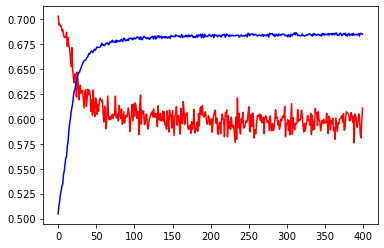

In [15]:
steps = int(len(model_trainingInfo["training_loss"])/len(model_trainingInfo["validation_accuracy"]))
plt.plot(model_trainingInfo["training_loss"][::steps], color = "red")
plt.plot(model_trainingInfo["validation_accuracy"], color = "blue")

In [16]:
path = "models//modelCarlos_2019.pth"

In [17]:
torch.save(modelCarlos.state_dict(), path)
modelCarlos.load_state_dict(torch.load(path))
modelCarlos.eval()

DNN_Carlos(
  (drop1): Dropout(p=0.5, inplace=False)
  (drop2): Dropout(p=0.25, inplace=False)
  (linear1_1): Linear(in_features=31, out_features=31, bias=True)
  (linear2_1): Linear(in_features=31, out_features=10, bias=True)
  (linear3_1): Linear(in_features=10, out_features=5, bias=True)
  (linear1_2): Linear(in_features=31, out_features=31, bias=True)
  (linear2_2): Linear(in_features=31, out_features=10, bias=True)
  (linear3_2): Linear(in_features=10, out_features=5, bias=True)
  (bn1): BatchNorm1d(31, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (out): Linear(in_features=5, out_features=2, bias=True)
)

# 2018 trading data

In [87]:
START = "2015-01-01"
MIDDLE = "2018-01-01"
END = "2019-01-01"
training_data = data[(data["Unnamed: 0.1"] >= START) & (data["Unnamed: 0.1"] < MIDDLE)]
testing_data = data[(data["Unnamed: 0.1"] >= MIDDLE) & (data["Unnamed: 0.1"] < END)]
print(training_data.shape, testing_data.shape)

training_data = training_data.dropna()
testing_data = testing_data.dropna()
print(training_data.shape, testing_data.shape)

(368701, 33) (123972, 33)
(368625, 33) (123906, 33)


In [88]:
Y_training = training_data['Label'].apply(lambda x: f(x))
Y_testing = testing_data['Label'].apply(lambda x: f(x))

In [89]:
class TrainingData(Dataset):
    def __init__(self):
        self.x = torch.tensor(training_data[columns].values).float()
        self.y = torch.tensor(Y_training.values).long()
        self.len = self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len
    
class TestingData(Dataset):
    def __init__(self):
        self.x = torch.tensor(testing_data[columns].values).float()
        self.y = torch.tensor(Y_testing.values).long()
        self.len = self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

In [54]:
input_dim = 31
hidden1 = 31
hidden2 = 10
hidden3 = 5
out_dim = 2
dropout_rate = 0.5

model1 = DNN_Model1(input_dim, hidden1, hidden2, hidden3, out_dim, dropout_rate)
#model1.to("cuda")

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adadelta(model1.parameters())

training = TrainingData()
testing = TestingData()
train_loader = DataLoader(dataset = training, batch_size=2000, shuffle = True)
validation_loader = DataLoader(dataset = testing, batch_size=5000)

## Paper's model

In [55]:
model1_trainingInfo = train(model1, criterion, train_loader, validation_loader, optimizer, 500)

/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


LOSS: 0.6953195333480835 ACCURCY: 0.5095443481822838
current epoch 1 ,  0.2 % completed
LOSS: 0.6938625574111938 ACCURCY: 0.5156477337429595
current epoch 2 ,  0.4 % completed
LOSS: 0.6958860158920288 ACCURCY: 0.5215424557091654
current epoch 3 ,  0.6 % completed
LOSS: 0.6914752721786499 ACCURCY: 0.5283284137224783
current epoch 4 ,  0.8 % completed
LOSS: 0.6960777044296265 ACCURCY: 0.536634322580645
current epoch 5 ,  1.0 % completed
LOSS: 0.693318247795105 ACCURCY: 0.5510689278033793
current epoch 6 ,  1.2 % completed
LOSS: 0.6862400770187378 ACCURCY: 0.5709112667690732
current epoch 7 ,  1.4 % completed
LOSS: 0.6745895147323608 ACCURCY: 0.601126037890425
current epoch 8 ,  1.6 % completed
LOSS: 0.6582931280136108 ACCURCY: 0.6530551152073732
current epoch 9 ,  1.8 % completed
LOSS: 0.6548216342926025 ACCURCY: 0.6281910988223247
current epoch 10 ,  2.0 % completed
LOSS: 0.6541288495063782 ACCURCY: 0.6572122601126472
current epoch 11 ,  2.2 % completed
LOSS: 0.6471998691558838 ACCURCY:

LOSS: 0.5904902815818787 ACCURCY: 0.6718023676395287
current epoch 93 ,  18.6 % completed
LOSS: 0.6099470853805542 ACCURCY: 0.6783889564772144
current epoch 94 ,  18.8 % completed
LOSS: 0.6059253811836243 ACCURCY: 0.6803713630312339
current epoch 95 ,  19.0 % completed
LOSS: 0.5856859683990479 ACCURCY: 0.678149603686636
current epoch 96 ,  19.2 % completed
LOSS: 0.6184725165367126 ACCURCY: 0.6783668817204301
current epoch 97 ,  19.4 % completed
LOSS: 0.6084002256393433 ACCURCY: 0.6784100686123911
current epoch 98 ,  19.6 % completed
LOSS: 0.6268419027328491 ACCURCY: 0.67792688172043
current epoch 99 ,  19.8 % completed
LOSS: 0.6016501784324646 ACCURCY: 0.6715086246799794
current epoch 100 ,  20.0 % completed
LOSS: 0.6226574182510376 ACCURCY: 0.6789921761392729
current epoch 101 ,  20.2 % completed
LOSS: 0.6032914519309998 ACCURCY: 0.6726148653353813
current epoch 102 ,  20.4 % completed
LOSS: 0.5887813568115234 ACCURCY: 0.671560458781362
current epoch 103 ,  20.6 % completed
LOSS: 0.62

LOSS: 0.6254105567932129 ACCURCY: 0.6795348817204301
current epoch 184 ,  36.8 % completed
LOSS: 0.6007257103919983 ACCURCY: 0.6787521597542243
current epoch 185 ,  37.0 % completed
LOSS: 0.5971219539642334 ACCURCY: 0.6758782345110087
current epoch 186 ,  37.2 % completed
LOSS: 0.6299352049827576 ACCURCY: 0.6804206410650282
current epoch 187 ,  37.4 % completed
LOSS: 0.6138469576835632 ACCURCY: 0.6753761269841269
current epoch 188 ,  37.6 % completed
LOSS: 0.6114428043365479 ACCURCY: 0.6781940849974398
current epoch 189 ,  37.8 % completed
LOSS: 0.5893859267234802 ACCURCY: 0.6806577695852535
current epoch 190 ,  38.0 % completed
LOSS: 0.5956335067749023 ACCURCY: 0.6790888069636456
current epoch 191 ,  38.2 % completed
LOSS: 0.615291953086853 ACCURCY: 0.673596309267793
current epoch 192 ,  38.4 % completed
LOSS: 0.6163302659988403 ACCURCY: 0.6768324751664107
current epoch 193 ,  38.6 % completed
LOSS: 0.6031696200370789 ACCURCY: 0.6731905335381464
current epoch 194 ,  38.8 % completed
L

LOSS: 0.6262263655662537 ACCURCY: 0.6791707158218127
current epoch 275 ,  55.0 % completed
LOSS: 0.6001899242401123 ACCURCY: 0.6766731223758322
current epoch 276 ,  55.2 % completed
LOSS: 0.6126213073730469 ACCURCY: 0.6797227322068613
current epoch 277 ,  55.4 % completed
LOSS: 0.5999466776847839 ACCURCY: 0.6784068817204301
current epoch 278 ,  55.6 % completed
LOSS: 0.6056625247001648 ACCURCY: 0.6798520102406554
current epoch 279 ,  55.8 % completed
LOSS: 0.5868947505950928 ACCURCY: 0.6799681597542242
current epoch 280 ,  56.0 % completed
LOSS: 0.6147871017456055 ACCURCY: 0.679700325652842
current epoch 281 ,  56.2 % completed
LOSS: 0.6003879904747009 ACCURCY: 0.6753780849974398
current epoch 282 ,  56.4 % completed
LOSS: 0.5921278595924377 ACCURCY: 0.6779115125448029
current epoch 283 ,  56.6 % completed
LOSS: 0.6230874061584473 ACCURCY: 0.6788859190988226
current epoch 284 ,  56.8 % completed
LOSS: 0.6174860000610352 ACCURCY: 0.6785406574500767
current epoch 285 ,  57.0 % completed


LOSS: 0.6208281517028809 ACCURCY: 0.679575512544803
current epoch 366 ,  73.2 % completed
LOSS: 0.6057212352752686 ACCURCY: 0.6810625663082439
current epoch 367 ,  73.4 % completed
LOSS: 0.6026443839073181 ACCURCY: 0.6756561433691757
current epoch 368 ,  73.6 % completed
LOSS: 0.6105097532272339 ACCURCY: 0.6726247741935484
current epoch 369 ,  73.8 % completed
LOSS: 0.6342667937278748 ACCURCY: 0.6782615873015874
current epoch 370 ,  74.0 % completed
LOSS: 0.613932728767395 ACCURCY: 0.6771784004096262
current epoch 371 ,  74.2 % completed
LOSS: 0.6045846343040466 ACCURCY: 0.6795652718894009
current epoch 372 ,  74.4 % completed
LOSS: 0.6063022613525391 ACCURCY: 0.6788776036866361
current epoch 373 ,  74.6 % completed
LOSS: 0.6010558009147644 ACCURCY: 0.6763518279569891
current epoch 374 ,  74.8 % completed
LOSS: 0.5991925597190857 ACCURCY: 0.6773236784434203
current epoch 375 ,  75.0 % completed
LOSS: 0.5923230648040771 ACCURCY: 0.6753604751664106
current epoch 376 ,  75.2 % completed
L

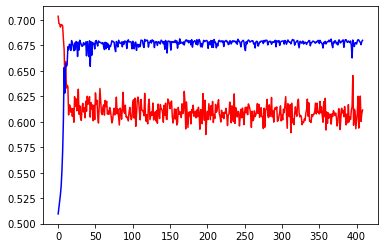

In [56]:
steps = int(len(model1_trainingInfo["training_loss"])/len(model1_trainingInfo["validation_accuracy"]))
plt.plot(model1_trainingInfo["training_loss"][::steps], color = "red")
plt.plot(model1_trainingInfo["validation_accuracy"], color = "blue")

In [ ]:
path = "models//model1_2018.pth"
torch.save(model1.state_dict(), path)

## Carlos' model

In [90]:
input_dim = 31
hidden1 = 31
hidden2 = 10
hidden3 = 5
out_dim = 2

model = DNN_Carlos(input_dim, hidden1, hidden2, hidden3, out_dim)
#model.to("cuda")

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

training = TrainingData()
testing = TestingData()
train_loader = DataLoader(dataset = training, batch_size=2000, shuffle = True)
validation_loader = DataLoader(dataset = testing, batch_size=5000)

In [91]:
model_trainingInfo = trainMyModel(model, criterion, train_loader, validation_loader, optimizer, 400)

/home/cs582/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


LOSS: 0.7143362760543823 ACCURCY: 0.49966685509472597
current epoch 1 ,  0.25 % completed
LOSS: 0.7080737948417664 ACCURCY: 0.49966685509472597
current epoch 2 ,  0.5 % completed
LOSS: 0.698361337184906 ACCURCY: 0.49966685509472597
current epoch 3 ,  0.75 % completed
LOSS: 0.7032448649406433 ACCURCY: 0.5079900747567845
current epoch 4 ,  1.0 % completed
LOSS: 0.6960704326629639 ACCURCY: 0.5185462570404507
current epoch 5 ,  1.25 % completed
LOSS: 0.7003247141838074 ACCURCY: 0.5235446799795187
current epoch 6 ,  1.5 % completed
LOSS: 0.6930832862854004 ACCURCY: 0.5337079324116744
current epoch 7 ,  1.75 % completed
LOSS: 0.6920583844184875 ACCURCY: 0.5380881146953405
current epoch 8 ,  2.0 % completed
LOSS: 0.6936198472976685 ACCURCY: 0.5432273179723502
current epoch 9 ,  2.25 % completed
LOSS: 0.6857728958129883 ACCURCY: 0.547266986175115
current epoch 10 ,  2.5 % completed
LOSS: 0.6950372457504272 ACCURCY: 0.5538027199180748
current epoch 11 ,  2.75 % completed
LOSS: 0.685607552528381

LOSS: 0.6154605746269226 ACCURCY: 0.6724298863287251
current epoch 93 ,  23.25 % completed
LOSS: 0.6176643371582031 ACCURCY: 0.6717111807475679
current epoch 94 ,  23.5 % completed
LOSS: 0.6090980172157288 ACCURCY: 0.6726926246799795
current epoch 95 ,  23.75 % completed
LOSS: 0.6021008491516113 ACCURCY: 0.6743847741935484
current epoch 96 ,  24.0 % completed
LOSS: 0.5952474474906921 ACCURCY: 0.673250068612391
current epoch 97 ,  24.25 % completed
LOSS: 0.5798462629318237 ACCURCY: 0.672056458781362
current epoch 98 ,  24.5 % completed
LOSS: 0.6172972917556763 ACCURCY: 0.6737227158218124
current epoch 99 ,  24.75 % completed
LOSS: 0.6012346744537354 ACCURCY: 0.6720385171530977
current epoch 100 ,  25.0 % completed
LOSS: 0.6301449537277222 ACCURCY: 0.6729473466461855
current epoch 101 ,  25.25 % completed
LOSS: 0.6195634007453918 ACCURCY: 0.6734673302611368
current epoch 102 ,  25.5 % completed
LOSS: 0.6050477623939514 ACCURCY: 0.6735034961597544
current epoch 103 ,  25.75 % completed
LO

LOSS: 0.59235018491745 ACCURCY: 0.6776161433691757
current epoch 183 ,  45.75 % completed
LOSS: 0.6017612218856812 ACCURCY: 0.6770158279569894
current epoch 184 ,  46.0 % completed
LOSS: 0.6187269687652588 ACCURCY: 0.6778558443420378
current epoch 185 ,  46.25 % completed
LOSS: 0.6195751428604126 ACCURCY: 0.6764187158218126
current epoch 186 ,  46.5 % completed
LOSS: 0.6068013906478882 ACCURCY: 0.6773438279569893
current epoch 187 ,  46.75 % completed
LOSS: 0.6184268593788147 ACCURCY: 0.6769114961597542
current epoch 188 ,  47.0 % completed
LOSS: 0.6254755854606628 ACCURCY: 0.6772865335381464
current epoch 189 ,  47.25 % completed
LOSS: 0.6222545504570007 ACCURCY: 0.6773275125448031
current epoch 190 ,  47.5 % completed
LOSS: 0.6072381734848022 ACCURCY: 0.67749808499744
current epoch 191 ,  47.75 % completed
LOSS: 0.5850702524185181 ACCURCY: 0.677833122375832
current epoch 192 ,  48.0 % completed
LOSS: 0.6113294363021851 ACCURCY: 0.6774932718894009
current epoch 193 ,  48.25 % complete

LOSS: 0.6012603640556335 ACCURCY: 0.6769838279569893
current epoch 273 ,  68.25 % completed
LOSS: 0.5977858304977417 ACCURCY: 0.6759620686123913
current epoch 274 ,  68.5 % completed
LOSS: 0.6038933396339417 ACCURCY: 0.6758420686123913
current epoch 275 ,  68.75 % completed
LOSS: 0.585047721862793 ACCURCY: 0.6776302345110088
current epoch 276 ,  69.0 % completed
LOSS: 0.6150451302528381 ACCURCY: 0.6763499027137736
current epoch 277 ,  69.25 % completed
LOSS: 0.6098204851150513 ACCURCY: 0.6759409564772146
current epoch 278 ,  69.5 % completed
LOSS: 0.5962161421775818 ACCURCY: 0.676768458781362
current epoch 279 ,  69.75 % completed
LOSS: 0.5801281929016113 ACCURCY: 0.6779723092677932
current epoch 280 ,  70.0 % completed
LOSS: 0.5853416323661804 ACCURCY: 0.6782807905785969
current epoch 281 ,  70.25 % completed
LOSS: 0.6025921106338501 ACCURCY: 0.6781729564772145
current epoch 282 ,  70.5 % completed
LOSS: 0.5981025099754333 ACCURCY: 0.6772417532002047
current epoch 283 ,  70.75 % compl

LOSS: 0.587590754032135 ACCURCY: 0.6774043092677932
current epoch 363 ,  90.75 % completed
LOSS: 0.598344624042511 ACCURCY: 0.6768180849974398
current epoch 364 ,  91.0 % completed
LOSS: 0.6163071990013123 ACCURCY: 0.6769681433691755
current epoch 365 ,  91.25 % completed
LOSS: 0.6100969910621643 ACCURCY: 0.6780443256528419
current epoch 366 ,  91.5 % completed
LOSS: 0.6040689945220947 ACCURCY: 0.677755031233999
current epoch 367 ,  91.75 % completed
LOSS: 0.597327709197998 ACCURCY: 0.6772913630312339
current epoch 368 ,  92.0 % completed
LOSS: 0.6043481230735779 ACCURCY: 0.6771681433691757
current epoch 369 ,  92.25 % completed
LOSS: 0.598172664642334 ACCURCY: 0.677419363031234
current epoch 370 ,  92.5 % completed
LOSS: 0.6136804223060608 ACCURCY: 0.6767636784434202
current epoch 371 ,  92.75 % completed
LOSS: 0.5968956351280212 ACCURCY: 0.6777390312339989
current epoch 372 ,  93.0 % completed
LOSS: 0.623073399066925 ACCURCY: 0.6768219190988224
current epoch 373 ,  93.25 % completed


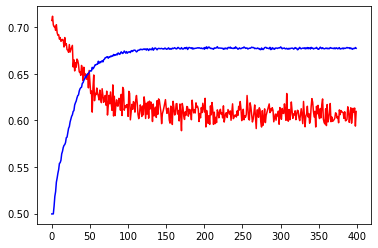

In [92]:
steps = int(len(model_trainingInfo["training_loss"])/len(model_trainingInfo["validation_accuracy"]))
plt.plot(model_trainingInfo["training_loss"][::steps], color = "red")
plt.plot(model_trainingInfo["validation_accuracy"], color = "blue")

In [93]:
path = "models//modelCarlos_2018.pth"

In [94]:
torch.save(model.state_dict(), path)